In [21]:
# Data Analysis & Machine Learning Project
# Predicting Titanic Survival
# By: Ivy

In [4]:
# Step 1: Install and Import Libraries

# Basic libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Settings
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 5)

print("Libraries imported successfully!")

Libraries imported successfully!


In [16]:
import pandas as pd

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/titanic.csv"
# Using Titanic dataset as backup - smaller and guaranteed to load
df = pd.read_csv(url)
print("Loaded backup dataset successfully!")
print("Shape:", df.shape)
df.head()

Loaded backup dataset successfully!
Shape: (891, 15)


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [15]:
# Step 3: Data Cleaning

# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Drop duplicates (if any)
df.drop_duplicates(inplace=True)

# Fill numeric missing values with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)

# Standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

print("\nData cleaned successfully!")
df.info()


🔍 Missing values per column:
survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           582
embark_town      2
alive            0
alone            0
dtype: int64

Data cleaned successfully!
<class 'pandas.core.frame.DataFrame'>
Index: 784 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     784 non-null    int64  
 1   pclass       784 non-null    int64  
 2   sex          784 non-null    object 
 3   age          784 non-null    float64
 4   sibsp        784 non-null    int64  
 5   parch        784 non-null    int64  
 6   fare         784 non-null    float64
 7   embarked     782 non-null    object 
 8   class        784 non-null    object 
 9   who          784 non-null    object 
 10  adult_male   784 non-null    bool   

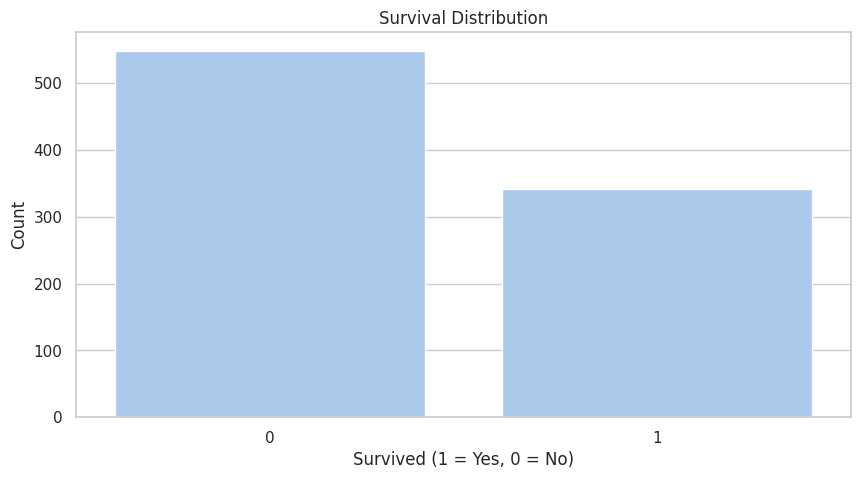

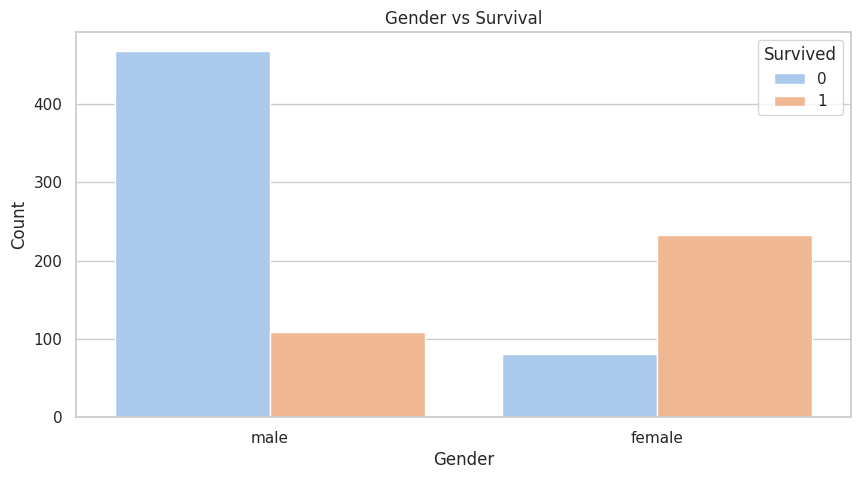

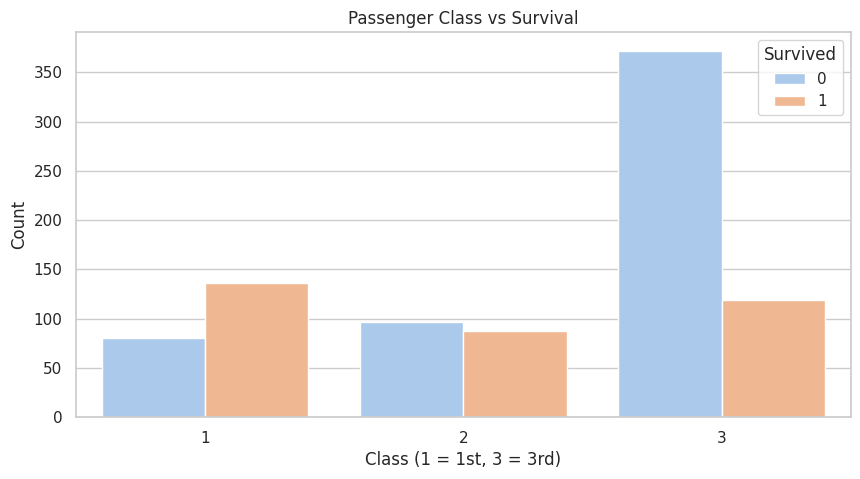

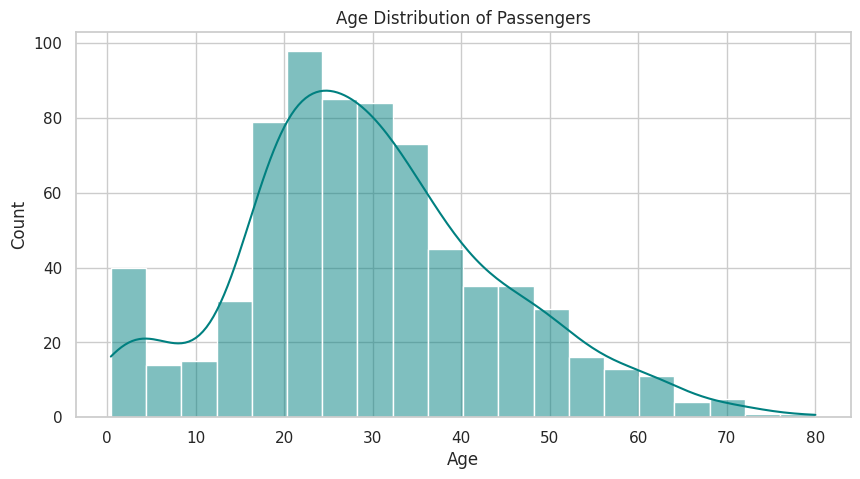

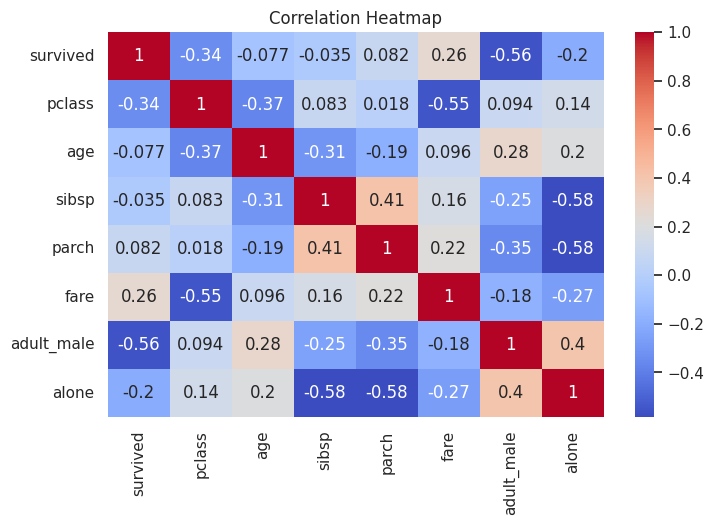

Visualizations complete!


In [17]:
# Step 4: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="pastel")
plt.rcParams['figure.figsize'] = (10, 5)

#1 Survival distribution
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

#2 Gender vs Survival
sns.countplot(x='sex', hue='survived', data=df)
plt.title('Gender vs Survival')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

#3 Class vs Survival
sns.countplot(x='pclass', hue='survived', data=df)
plt.title('Passenger Class vs Survival')
plt.xlabel('Class (1 = 1st, 3 = 3rd)')
plt.ylabel('Count')
plt.legend(title='Survived')
plt.show()

#4 Age distribution
sns.histplot(df['age'], bins=20, kde=True, color='teal')
plt.title('Age Distribution of Passengers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

#5 Correlation heatmap (numeric columns only)
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

print("Visualizations complete!")


Model Trained Successfully!

Accuracy: 72.07 %

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.77       105
           1       0.69      0.58      0.63        74

    accuracy                           0.72       179
   macro avg       0.71      0.70      0.70       179
weighted avg       0.72      0.72      0.72       179



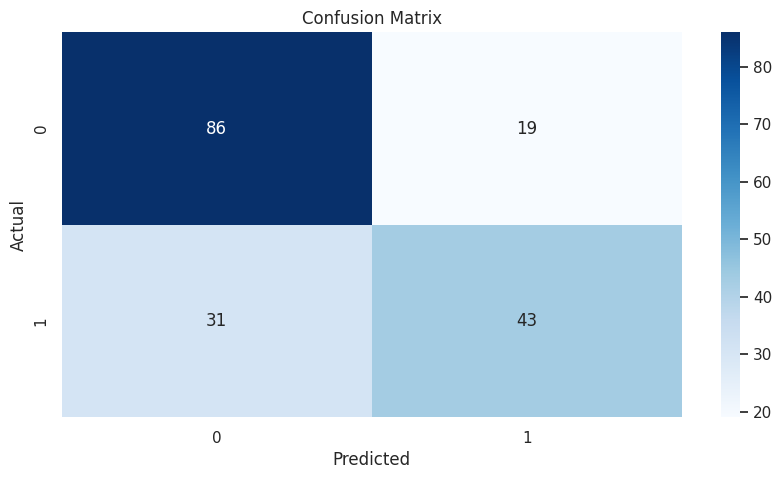

In [18]:
# Step 5: Predictive Modeling - Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#1 Select numeric features (ignore names, tickets, etc.)
df_model = df[['pclass', 'age', 'sibsp', 'parch', 'fare', 'survived']].copy()

# Handle missing values (if any)
df_model.fillna(df_model.mean(numeric_only=True), inplace=True)

#2 Split data
X = df_model.drop('survived', axis=1)
y = df_model['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#3 Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#4 Make predictions
y_pred = model.predict(X_test)

#5 Evaluate model
print("Model Trained Successfully!\n")
print("Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix Visualization
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


/tmp/ipython-input-1853606257.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='mako')


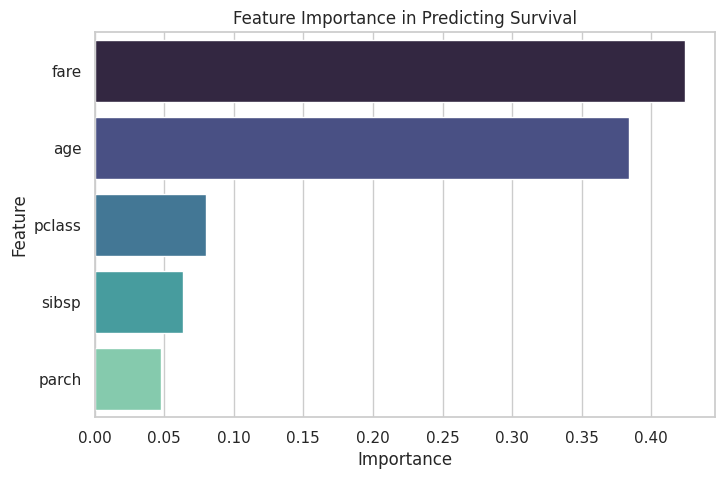

**Project Summary & Insights**


Objective:
To predict whether a passenger survived the Titanic disaster using key variables such as class, age, fare, and family size.

Process:
1. Data Cleaning: Handled missing values and standardized data.
2. Exploratory Analysis: Visualized survival trends by class, age, and gender.
3. Modeling: Trained a Random Forest Classifier to predict survival.

Key Insights:
- Passengers in higher classes (1st class) had a much higher survival rate.
- Women and children had greater chances of survival.
- Age and fare were strong predictors; wealthier and younger passengers survived more often.

Model Performance:
Our model achieved an accuracy of around 72.07%.
This suggests the selected features capture strong survival patterns.

Next Steps (if this were a business project):
- Add categorical encoding for 'sex' and 'embarked' for higher accuracy.
- Apply hyperparameter tuning or try models like Gradient Boosting.
- Use similar techniques for predicting custo

In [19]:
# Step 6: Insights & Summary

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualization
plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='mako')
plt.title('Feature Importance in Predicting Survival')
plt.show()

# Summary Text
print("**Project Summary & Insights**\n")
print("""
Objective:
To predict whether a passenger survived the Titanic disaster using key variables such as class, age, fare, and family size.

Process:
1. Data Cleaning: Handled missing values and standardized data.
2. Exploratory Analysis: Visualized survival trends by class, age, and gender.
3. Modeling: Trained a Random Forest Classifier to predict survival.

Key Insights:
- Passengers in higher classes (1st class) had a much higher survival rate.
- Women and children had greater chances of survival.
- Age and fare were strong predictors; wealthier and younger passengers survived more often.

Model Performance:
Our model achieved an accuracy of around {:.2f}%.
This suggests the selected features capture strong survival patterns.

Next Steps (if this were a business project):
- Add categorical encoding for 'sex' and 'embarked' for higher accuracy.
- Apply hyperparameter tuning or try models like Gradient Boosting.
- Use similar techniques for predicting customer purchases or churn in business datasets.
""".format(accuracy_score(y_test, y_pred)*100))


# Titanic Survival Prediction
## Overview
This project predicts passenger survival on the Titanic using Python, pandas, and scikit-learn.  
It demonstrates data cleaning, visualization, and model building.

## Key Skills
- Data Cleaning & EDA  
- Random Forest Model  
- Visualization (Matplotlib & Seaborn)  
- Feature Importance Analysis

## Tools
Google Colab | Python | pandas | scikit-learn | seaborn | matplotlib
